### 각 데이터 변수명에 해당되는 내용은 다음과 같습니다.

* df = 공시가격 원본파일
* df_2 = 학생체력 원본파일

* df1 = 전처리 완료된 공시가격 데이터


* df_2_A = 원본데이터에서 필요한 열만 가져온 데이터(열이름 변경까지)

* df_2_cou_sum =  지역 학년을 그룹화 한 뒤 %지수가 0인 데이터 제거
* df_2_cou_sum_log = % 지수 log데이터로 변환

* df_2_AAA = 전지역 전처리된 데이터에서 서울과 경북데이터만 가져온 데이터

* df_2_region = 서울, 경북기준으로 그룹합
* df_2_grade = 서울, 경북 학년별 그룹합

* df2 = 그룹한 한 데이터데이블을 합한 뒤 % 지수를 log 데이터로 변환 ( 최종 데이터)



In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib as mpl
import plotly.express as px

from dash import Dash, html, dcc, callback, Output, Input,dash_table
import plotly.graph_objects as go


plt.rc('font', family='Malgun Gothic')  #고딕체 설정
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("./data/2022년 공동주택 공시가격 정보.csv", encoding = 'cp949')
df_2 = pd.read_csv("./data/2022년도_학생의 체력 증진에 관한 사항(고)_전체.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_24220\3589909784.py:1: DtypeWarning: Columns (5,6,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/2022년 공동주택 공시가격 정보.csv", encoding = 'cp949')


In [3]:
df_3= pd.read_csv("./data/2022년도_학생의 체력 증진에 관한 사항(초)_전체.csv")

In [4]:
df.head()

,기준연도,기준월,법정동코드,도로명주소,시도,시군구,읍면,동리,특수지코드,본번,부번,특수지명,단지명,동명,호명,전용면적,공시가격,단지코드,동코드,호코드
0,2022,1,1111010100,서울특별시 종로구 자하문로36길 16-14,서울특별시,종로구,NaN,청운동,0,1,0,NaN,청운벽산빌리지,1,111,187.49,989000000,3,1,1
1,2022,1,1111010100,서울특별시 종로구 자하문로36길 16-14,서울특별시,종로구,NaN,청운동,0,1,0,NaN,청운벽산빌리지,1,112,187.49,989000000,3,1,2
2,2022,1,1111010100,서울특별시 종로구 자하문로36길 16-14,서울특별시,종로구,NaN,청운동,0,1,0,NaN,청운벽산빌리지,1,121,157.25,926000000,3,1,3
3,2022,1,1111010100,서울특별시 종로구 자하문로36길 16-14,서울특별시,종로구,NaN,청운동,0,1,0,NaN,청운벽산빌리지,1,122,157.25,926000000,3,1,4
4,2022,1,1111010100,서울특별시 종로구 자하문로36길 16-14,서울특별시,종로구,NaN,청운동,0,1,0,NaN,청운벽산빌리지,1,131,152.33,905000000,3,1,5


In [5]:
df_1 = df.copy()

In [6]:
df_1['지역']=df_1['시도'] + " "+ df_1['시군구']

In [7]:
df_1 = df_1.groupby('지역').mean()

C:\Users\user\AppData\Local\Temp\ipykernel_24220\2590490514.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_1 = df_1.groupby('지역').mean()


In [8]:
df_1 = pd.DataFrame(df_1['공시가격'])

In [9]:
df_1['순위']= df_1.rank(method='max', ascending=False)['공시가격']
df_1 = df_1.sort_values('순위')
df_1=df_1.reset_index(0) # 인덱스 재지정
df_1

,지역,공시가격,순위
0,서울특별시 강남구,1.377143e+09,1.0
1,서울특별시 서초구,1.298534e+09,2.0
2,경기도 과천시,1.138727e+09,3.0
3,서울특별시 용산구,1.017433e+09,4.0
4,경기도 성남분당구,8.801597e+08,5.0
...,...,...,...
244,충청북도 단양군,5.498920e+07,245.0
245,인천광역시 옹진군,5.185715e+07,246.0
246,경상북도 봉화군,4.954572e+07,247.0
247,강원도 태백시,4.711135e+07,248.0


# 공시가격 데이터

In [10]:
# 주소지를 정리 새로운 컬럼 생성
df1 = df.groupby('시도').mean()

C:\Users\user\AppData\Local\Temp\ipykernel_24220\992942956.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby('시도').mean()


In [11]:
# 정리된 데이터 중 공시가격만 가져옴
df1 = pd.DataFrame(df1['공시가격'])

In [12]:
# 공시가격이 높은 순으로 순위를 매겨 새로운 열로 지정
df1['순위']= df1.rank(method='max', ascending=False)['공시가격']
df1 = df1.sort_values('순위')
df1=df1.reset_index(0) # 인덱스 재지정

In [13]:
df1

,시도,공시가격,순위
0,서울특별시,6.055722e+08,1.0
1,세종특별자치시,4.029578e+08,2.0
2,경기도,3.318625e+08,3.0
3,부산광역시,2.419112e+08,4.0
4,대전광역시,2.395129e+08,5.0
5,대구광역시,2.388536e+08,6.0
6,인천광역시,2.320039e+08,7.0
7,울산광역시,1.897654e+08,8.0
8,광주광역시,1.801675e+08,9.0
9,제주특별자치도,1.763634e+08,10.0


In [14]:
import plotly.express as px
fig = px.pie(df1, values='공시가격', names="시도")

fig.show()

# 학생체력 데이터

In [15]:
df_2

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,학년,...,%,인원.1,%.1,인원.2,%.2,인원.3,%.3,인원.4,%.4,검사인원수
0,서울특별시교육청,교육부,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,6.3,13.0,40.6,14.0,43.8,3.0,9.4,0.0,0.0,32.0
1,서울특별시교육청,교육부,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,2.6,67.0,57.8,44.0,37.9,2.0,1.7,0.0,0.0,116.0
2,서울특별시교육청,교육부,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,0.0,8.0,44.4,9.0,50.0,0.0,0.0,1.0,5.6,18.0
3,서울특별시교육청,교육부,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,2.4,56.0,44.8,61.0,48.8,5.0,4.0,0.0,0.0,125.0
4,서울특별시교육청,교육부,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,3학년,...,0.0,6.0,27.3,9.0,40.9,7.0,31.8,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,1학년,...,2.9,29.0,42.6,30.0,44.1,7.0,10.3,0.0,0.0,68.0
11544,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,0.0,12.0,42.9,9.0,32.1,6.0,21.4,1.0,3.6,28.0
11545,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,3.3,16.0,26.7,29.0,48.3,13.0,21.7,0.0,0.0,60.0
11546,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,3학년,...,0.0,6.0,19.4,18.0,58.1,7.0,22.6,0.0,0.0,31.0


In [16]:
# 제외여부가 Y인 데이터 삭제
df_2.drop(df_2[df_2['제외여부']=='Y'].index, inplace = True)
df_3.drop(df_2[df_2['제외여부']=='Y'].index, inplace = True)

In [17]:
# 원하는 열만 추출
df_2_A=df_2[['시도교육청','지역','학교명','학년','성별',
           '인원','%','인원.1','%.1','인원.2','%.2','인원.3','%.3','인원.4','%.4','검사인원수']]


df_3_A=df_3[['시도교육청','지역','학교명','학년','성별',
           '인원','%','인원.1','%.1','인원.2','%.2','인원.3','%.3','인원.4','%.4','검사인원수']]

In [18]:
# 열이름 변경
df_2_A.rename(columns = {'%':'1등급 %'}, inplace = True)
df_2_A.rename(columns = {'인원':'1등급 인원'}, inplace = True)

for i in range(4):
    df_2_A.rename(columns = {f'%.{i+1}':f'{i+2}등급 %'}, inplace = True)
    df_2_A.rename(columns = {f'인원.{i+1}':f'{i+2}등급 인원'}, inplace = True)
    
    
    
# 열이름 변경
df_3_A.rename(columns = {'%':'1등급 %'}, inplace = True)
df_3_A.rename(columns = {'인원':'1등급 인원'}, inplace = True)

for i in range(4):
    df_3_A.rename(columns = {f'%.{i+1}':f'{i+2}등급 %'}, inplace = True)
    df_3_A.rename(columns = {f'인원.{i+1}':f'{i+2}등급 인원'}, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_24220\4161807895.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_24220\4161807895.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_24220\4161807895.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_24220\4161807895.py:7: SettingWithCopyWarning:


A value is 

In [19]:
df_2_AA = df_2_A.copy()
df_3_AA = df_3_A.copy()

In [20]:
df_2_AA

,시도교육청,지역,학교명,학년,성별,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수
0,서울특별시교육청,서울특별시 강남구,국립국악고등학교,1학년,남자,2.0,6.3,13.0,40.6,14.0,43.8,3.0,9.4,0.0,0.0,32.0
1,서울특별시교육청,서울특별시 강남구,국립국악고등학교,1학년,여자,3.0,2.6,67.0,57.8,44.0,37.9,2.0,1.7,0.0,0.0,116.0
2,서울특별시교육청,서울특별시 강남구,국립국악고등학교,2학년,남자,0.0,0.0,8.0,44.4,9.0,50.0,0.0,0.0,1.0,5.6,18.0
3,서울특별시교육청,서울특별시 강남구,국립국악고등학교,2학년,여자,3.0,2.4,56.0,44.8,61.0,48.8,5.0,4.0,0.0,0.0,125.0
4,서울특별시교육청,서울특별시 강남구,국립국악고등학교,3학년,남자,0.0,0.0,6.0,27.3,9.0,40.9,7.0,31.8,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,제주특별자치도교육청,제주특별자치도 제주시,제주외국어고등학교,1학년,여자,2.0,2.9,29.0,42.6,30.0,44.1,7.0,10.3,0.0,0.0,68.0
11544,제주특별자치도교육청,제주특별자치도 제주시,제주외국어고등학교,2학년,남자,0.0,0.0,12.0,42.9,9.0,32.1,6.0,21.4,1.0,3.6,28.0
11545,제주특별자치도교육청,제주특별자치도 제주시,제주외국어고등학교,2학년,여자,2.0,3.3,16.0,26.7,29.0,48.3,13.0,21.7,0.0,0.0,60.0
11546,제주특별자치도교육청,제주특별자치도 제주시,제주외국어고등학교,3학년,남자,0.0,0.0,6.0,19.4,18.0,58.1,7.0,22.6,0.0,0.0,31.0


In [21]:
# 지역과 학년을 한번에 묶어 그룹합을 진행한다.
df_2_AA['지역']= df_2_AA['지역']+" "+ df_2_AA['학년']
df_2_AA_group = df_2_AA.groupby('지역').sum()


df_3_AA['지역']= df_3_AA['지역']+" "+ df_3_AA['학년']
df_3_AA_group = df_3_AA.groupby('지역').sum()

C:\Users\user\AppData\Local\Temp\ipykernel_24220\2566860598.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_24220\2566860598.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [22]:
df_2_cou_sum=df_2_AA_group.reset_index(drop=False) #인덱스 재지정



df_3_cou_sum=df_3_AA_group.reset_index(drop=False) #인덱스 재지정

In [23]:
# 지역과 학년으로 열을 구분함
df_2_cou_sum['학년']=df_2_cou_sum['지역']
df_2_cou_sum['학년']=(df_2_cou_sum['학년'].apply(lambda x : x.split(' ')[-1]))
df_2_cou_sum['지역']=df_2_cou_sum['지역'].apply(lambda x : x.split(' ')[0])
# %값을 새로 구해준다
for i in range(5):
    df_2_cou_sum[f'{i+1}등급 %']= round(df_2_cou_sum[f'{i+1}등급 인원']/df_2_cou_sum['검사인원수'] * 100,3)
    
    
    
# 지역과 학년으로 열을 구분함
df_3_cou_sum['학년']=df_3_cou_sum['지역']
df_3_cou_sum['학년']=(df_3_cou_sum['학년'].apply(lambda x : x.split(' ')[-1]))
df_3_cou_sum['지역']=df_3_cou_sum['지역'].apply(lambda x : x.split(' ')[0])
# %값을 새로 구해준다
for i in range(5):
    df_3_cou_sum[f'{i+1}등급 %']= round(df_3_cou_sum[f'{i+1}등급 인원']/df_3_cou_sum['검사인원수'] * 100,3)

In [24]:
df_2_cou_sum

,지역,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수,학년
0,강원특별자치도,106.0,6.389,527.0,31.766,792.0,47.740,214.0,12.899,20.0,1.206,1659.0,1학년
1,강원특별자치도,83.0,4.598,564.0,31.247,862.0,47.756,270.0,14.958,26.0,1.440,1805.0,2학년
2,강원특별자치도,93.0,5.038,550.0,29.794,880.0,47.671,277.0,15.005,46.0,2.492,1846.0,3학년
3,강원특별자치도,6.0,4.762,56.0,44.444,51.0,40.476,13.0,10.317,0.0,0.000,126.0,1학년
4,강원특별자치도,9.0,7.500,61.0,50.833,39.0,32.500,10.0,8.333,1.0,0.833,120.0,2학년
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,충청북도,69.0,3.136,526.0,23.909,1059.0,48.136,477.0,21.682,69.0,3.136,2200.0,2학년
746,충청북도,45.0,2.030,473.0,21.335,997.0,44.971,603.0,27.199,99.0,4.465,2217.0,3학년
747,충청북도,54.0,3.396,400.0,25.157,687.0,43.208,368.0,23.145,81.0,5.094,1590.0,1학년
748,충청북도,55.0,3.148,395.0,22.610,790.0,45.220,399.0,22.839,108.0,6.182,1747.0,2학년


In [25]:
for i in range(5):
    df_2_cou_sum=df_2_cou_sum[df_2_cou_sum[f'{i+1}등급 %']>0]
    
    
for i in range(5):
    df_3_cou_sum=df_3_cou_sum[df_3_cou_sum[f'{i+1}등급 %']>0]

In [26]:
df_2_cou_sum

,지역,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수,학년
0,강원특별자치도,106.0,6.389,527.0,31.766,792.0,47.740,214.0,12.899,20.0,1.206,1659.0,1학년
1,강원특별자치도,83.0,4.598,564.0,31.247,862.0,47.756,270.0,14.958,26.0,1.440,1805.0,2학년
2,강원특별자치도,93.0,5.038,550.0,29.794,880.0,47.671,277.0,15.005,46.0,2.492,1846.0,3학년
4,강원특별자치도,9.0,7.500,61.0,50.833,39.0,32.500,10.0,8.333,1.0,0.833,120.0,2학년
5,강원특별자치도,4.0,2.837,58.0,41.135,61.0,43.262,16.0,11.348,2.0,1.418,141.0,3학년
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,충청북도,69.0,3.136,526.0,23.909,1059.0,48.136,477.0,21.682,69.0,3.136,2200.0,2학년
746,충청북도,45.0,2.030,473.0,21.335,997.0,44.971,603.0,27.199,99.0,4.465,2217.0,3학년
747,충청북도,54.0,3.396,400.0,25.157,687.0,43.208,368.0,23.145,81.0,5.094,1590.0,1학년
748,충청북도,55.0,3.148,395.0,22.610,790.0,45.220,399.0,22.839,108.0,6.182,1747.0,2학년


In [27]:
df_2_cou_sum_log = df_2_cou_sum.copy()


df_3_cou_sum_log = df_3_cou_sum.copy()

In [28]:
df_2_cou_sum

,지역,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수,학년
0,강원특별자치도,106.0,6.389,527.0,31.766,792.0,47.740,214.0,12.899,20.0,1.206,1659.0,1학년
1,강원특별자치도,83.0,4.598,564.0,31.247,862.0,47.756,270.0,14.958,26.0,1.440,1805.0,2학년
2,강원특별자치도,93.0,5.038,550.0,29.794,880.0,47.671,277.0,15.005,46.0,2.492,1846.0,3학년
4,강원특별자치도,9.0,7.500,61.0,50.833,39.0,32.500,10.0,8.333,1.0,0.833,120.0,2학년
5,강원특별자치도,4.0,2.837,58.0,41.135,61.0,43.262,16.0,11.348,2.0,1.418,141.0,3학년
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,충청북도,69.0,3.136,526.0,23.909,1059.0,48.136,477.0,21.682,69.0,3.136,2200.0,2학년
746,충청북도,45.0,2.030,473.0,21.335,997.0,44.971,603.0,27.199,99.0,4.465,2217.0,3학년
747,충청북도,54.0,3.396,400.0,25.157,687.0,43.208,368.0,23.145,81.0,5.094,1590.0,1학년
748,충청북도,55.0,3.148,395.0,22.610,790.0,45.220,399.0,22.839,108.0,6.182,1747.0,2학년


<Axes: xlabel='1등급 %', ylabel='Density'>

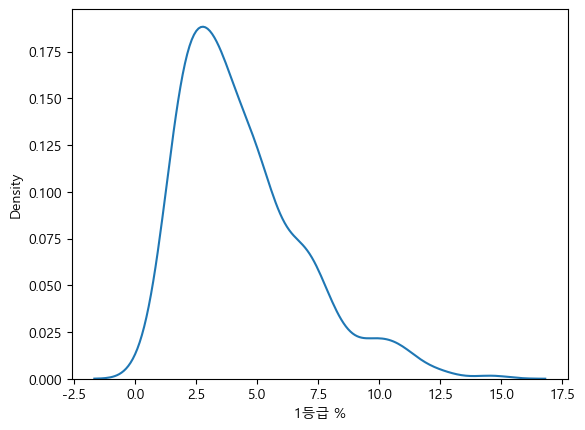

In [29]:
sns.kdeplot(df_2_cou_sum['1등급 %'])

<Axes: xlabel='1등급 %', ylabel='Density'>

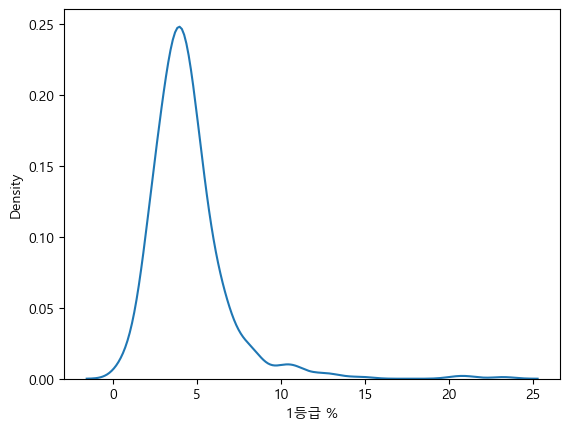

In [30]:
sns.kdeplot(df_3_cou_sum['1등급 %'])

In [31]:
# %지수를 로그데이터로 반환
for i in range(5):
    df_2_cou_sum_log[f'{i+1}등급 %']= np.log2(df_2_cou_sum_log[f'{i+1}등급 %'])
    
    
for i in range(5):
    df_3_cou_sum_log[f'{i+1}등급 %']= np.log2(df_3_cou_sum_log[f'{i+1}등급 %'])

In [32]:
df_2_cou_sum_log

,지역,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수,학년
0,강원특별자치도,106.0,2.675590,527.0,4.989412,792.0,5.577127,214.0,3.689187,20.0,0.270230,1659.0,1학년
1,강원특별자치도,83.0,2.201006,564.0,4.965646,862.0,5.577610,270.0,3.902845,26.0,0.526069,1805.0,2학년
2,강원특별자치도,93.0,2.332851,550.0,4.896950,880.0,5.575040,277.0,3.907371,46.0,1.317304,1846.0,3학년
4,강원특별자치도,9.0,2.906891,61.0,5.667693,39.0,5.022368,10.0,3.058836,1.0,-0.263612,120.0,2학년
5,강원특별자치도,4.0,1.504366,58.0,5.362295,61.0,5.435028,16.0,3.504366,2.0,0.503858,141.0,3학년
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,충청북도,69.0,1.648926,526.0,4.579482,1059.0,5.589044,477.0,4.438426,69.0,1.648926,2200.0,2학년
746,충청북도,45.0,1.021480,473.0,4.415150,997.0,5.490923,603.0,4.765482,99.0,2.158660,2217.0,3학년
747,충청북도,54.0,1.763836,400.0,4.652888,687.0,5.433227,368.0,4.532629,81.0,2.348799,1590.0,1학년
748,충청북도,55.0,1.654436,395.0,4.498889,790.0,5.498889,399.0,4.513428,108.0,2.628074,1747.0,2학년


In [33]:
# 로그값이 음수인것을 통계에서 제외시킴
for i in range(5):
    df_2_cou_sum_log=df_2_cou_sum_log[df_2_cou_sum_log[f'{i+1}등급 %']>0]
    
    
for i in range(5):
    df_3_cou_sum_log=df_3_cou_sum_log[df_3_cou_sum_log[f'{i+1}등급 %']>0]
    

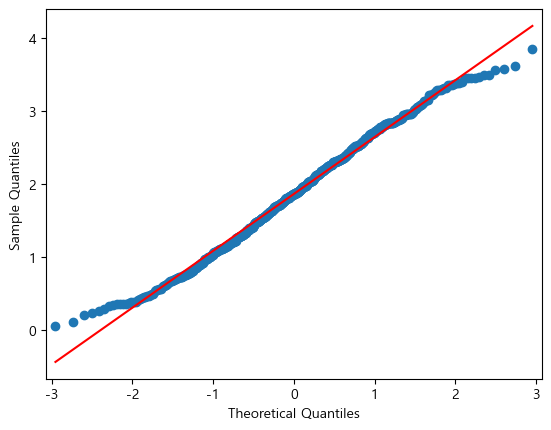

In [34]:
import statsmodels.api as smi
import pylab

sample_data = df_2_cou_sum_log['1등급 %']

smi.qqplot(sample_data, line = 'r')
pylab.show()

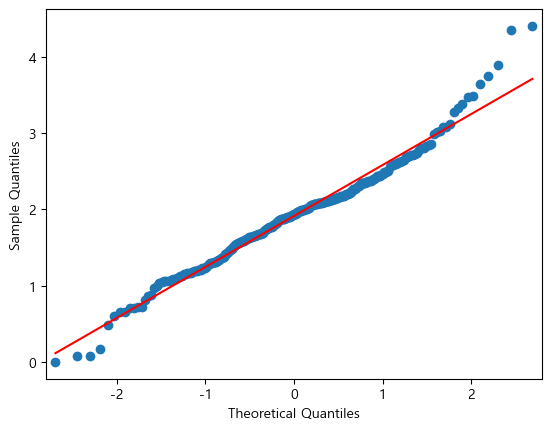

In [35]:
import statsmodels.api as smi
import pylab

sample_data = df_3_cou_sum_log['1등급 %']

smi.qqplot(sample_data, line = 'r')
pylab.show()

<Axes: xlabel='1등급 %', ylabel='Density'>

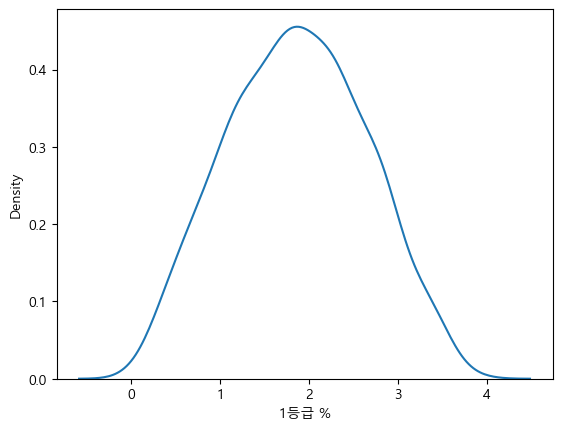

In [36]:
sns.kdeplot((df_2_cou_sum_log['1등급 %']))

In [37]:
# 위의 그래프에서 보이듯 정규성을 만족한다 볼 수 있다

<Axes: xlabel='1등급 %', ylabel='Density'>

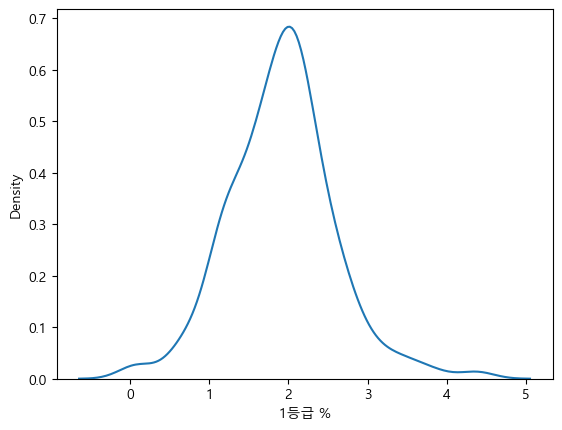

In [38]:
sns.kdeplot((df_3_cou_sum_log['1등급 %']))

In [39]:
# 지역이 서울과 경북에 해당되는 데이터만 가져옴
str_expr = "지역 in ['서울특별시' , '경상북도']"
df_2_AAA=df_2_cou_sum_log.query(str_expr)
df_2_AAA.reset_index(drop=True, inplace=True) # 인덱스 재지정
df_2_AAA

,지역,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수,학년
0,경상북도,72.0,1.975997,506.0,4.789208,867.0,5.566115,359.0,4.294033,26.0,0.506907,1830.0,1학년
1,경상북도,67.0,1.811471,543.0,4.830052,893.0,5.547758,372.0,4.284440,34.0,0.832688,1909.0,2학년
2,경상북도,62.0,1.678973,482.0,4.637900,833.0,5.427170,472.0,4.607626,87.0,2.168000,1936.0,3학년
3,경상북도,154.0,2.862154,829.0,5.290609,814.0,5.264236,292.0,3.785237,29.0,0.453122,2118.0,1학년
4,경상북도,91.0,2.083384,767.0,5.158822,996.0,5.535742,269.0,3.647199,24.0,0.160920,2147.0,2학년
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,서울특별시,95.0,2.424116,592.0,5.063762,824.0,5.540833,222.0,3.648696,37.0,1.063503,1770.0,1학년
121,서울특별시,95.0,2.224349,567.0,4.801676,977.0,5.586675,348.0,4.097442,46.0,1.178237,2033.0,2학년
122,서울특별시,84.0,1.922578,610.0,4.782775,1077.0,5.602914,382.0,4.107520,63.0,1.507414,2216.0,3학년
123,서울특별시,74.0,1.912267,616.0,4.969611,974.0,5.630580,273.0,3.795559,29.0,0.560715,1966.0,2학년


In [40]:
# 지역이 서울과 경북에 해당되는 데이터만 가져옴(초등학교)
str_expr = "지역 in ['서울특별시' , '경상북도']"
df_3_AAA=df_3_cou_sum_log.query(str_expr)
df_3_AAA.reset_index(drop=True, inplace=True) # 인덱스 재지정
df_3_AAA

,지역,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수,학년
0,경상북도,9.0,2.737038,41.0,4.924575,65.0,5.589404,18.0,3.736930,2.0,0.566572,135.0,4학년
1,경상북도,64.0,1.578214,581.0,4.760860,1141.0,5.734520,329.0,3.940355,28.0,0.386259,2143.0,5학년
2,경상북도,91.0,2.100978,724.0,5.093180,997.0,5.554773,287.0,3.758197,22.0,0.052416,2121.0,6학년
3,경상북도,102.0,2.440421,659.0,5.132248,860.0,5.516299,232.0,3.626089,26.0,0.468844,1879.0,6학년
4,경상북도,9.0,2.715674,50.0,5.189666,54.0,5.300709,21.0,3.938098,3.0,1.130931,137.0,4학년
5,경상북도,152.0,1.767655,1422.0,4.993448,2265.0,5.665023,559.0,3.646393,66.0,0.563646,4464.0,5학년
6,경상북도,140.0,1.738984,1332.0,4.989139,2071.0,5.625855,602.0,3.843381,49.0,0.224040,4194.0,6학년
7,경상북도,3.0,1.980757,29.0,5.253914,32.0,5.395920,11.0,3.855392,1.0,0.396159,76.0,6학년
8,경상북도,36.0,1.769349,316.0,4.903231,500.0,5.565232,191.0,4.176881,13.0,0.299831,1056.0,6학년
9,경상북도,9.0,2.346248,63.0,5.153522,85.0,5.585654,18.0,3.346106,2.0,0.176323,177.0,5학년


In [41]:
df_2_AAA_group = df_2_AAA.copy()
df_2_AAA_group2 = df_2_AAA.copy()



df_3_AAA_group = df_3_AAA.copy()
df_3_AAA_group2 = df_3_AAA.copy()

In [42]:
df_2_AAA_group2['지역']=df_2_AAA_group2['지역'] + ' ' + df_2_AAA_group2['학년']




df_3_AAA_group2['지역']=df_3_AAA_group2['지역'] + ' ' + df_3_AAA_group2['학년']

In [43]:
df_2_grade=df_2_AAA_group2.groupby('지역').sum()
for i in range(5):
    df_2_grade[f'{i+1}등급 %']= round(df_2_grade[f'{i+1}등급 인원']/df_2_grade['검사인원수'] * 100,3)
df_2_grade.reset_index(drop=False, inplace=True)




df_3_grade=df_3_AAA_group2.groupby('지역').sum()
for i in range(5):
    df_3_grade[f'{i+1}등급 %']= round(df_3_grade[f'{i+1}등급 인원']/df_3_grade['검사인원수'] * 100,3)
df_3_grade.reset_index(drop=False, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24220\1123399405.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_24220\1123399405.py:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [44]:
df_2_grade

,지역,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수
0,경상북도 1학년,859.0,5.349,5422.0,33.761,7000.0,43.587,2478.0,15.430,301.0,1.874,16060.0
1,경상북도 2학년,667.0,3.357,5995.0,30.177,9309.0,46.859,3465.0,17.442,430.0,2.165,19866.0
2,경상북도 3학년,798.0,3.997,5323.0,26.663,9094.0,45.552,4122.0,20.647,627.0,3.141,19964.0
3,서울특별시 1학년,2413.0,4.684,17528.0,34.027,22949.0,44.551,7638.0,14.828,984.0,1.910,51512.0
4,서울특별시 2학년,2587.0,3.559,20878.0,28.723,34102.0,46.916,13055.0,17.960,2066.0,2.842,72688.0
5,서울특별시 3학년,2347.0,3.168,19641.0,26.513,34016.0,45.918,15457.0,20.865,2619.0,3.535,74080.0


In [45]:
df_2_region=df_2_AAA_group.groupby('지역').sum()
# %값 다시 구함
for i in range(5):
    df_2_region[f'{i+1}등급 %']= round(df_2_region[f'{i+1}등급 인원']/df_2_region['검사인원수'] * 100,3)
df_2_region.reset_index(drop=False, inplace=True)




df_3_region=df_3_AAA_group.groupby('지역').sum()
# %값 다시 구함
for i in range(5):
    df_3_region[f'{i+1}등급 %']= round(df_3_region[f'{i+1}등급 인원']/df_3_region['검사인원수'] * 100,3)
df_3_region.reset_index(drop=False, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24220\3504986360.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_24220\3504986360.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [46]:
df_2_region

,지역,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수
0,경상북도,2324.0,4.158,16740.0,29.952,25403.0,45.452,10065.0,18.009,1358.0,2.430,55890.0
1,서울특별시,7347.0,3.705,58047.0,29.275,91067.0,45.928,36150.0,18.232,5669.0,2.859,198280.0


In [47]:
df2=pd.concat([df_2_grade, df_2_region])
df2



df3=pd.concat([df_3_grade, df_3_region])


In [48]:
df2.replace('서울특별시','서울특별시 전학년 평균', inplace = True)
df2.replace('경상북도','경상북도 전학년 평균', inplace = True)
df2.sort_values('지역', ascending = False, inplace = True)


df2.reset_index(drop=True, inplace=True)
df2




df3.replace('서울특별시','서울특별시 전학년 평균', inplace = True)
df3.replace('경상북도','경상북도 전학년 평균', inplace = True)
df3.sort_values('지역', ascending = False, inplace = True)


df3.reset_index(drop=True, inplace=True)


In [49]:
for i in range(5):
    df2[f'{i+1}등급 %']= round(np.log2(df2[f'{i+1}등급 %']),3) # %지수를 log값으로(소숫점 3자리) 반환
    
    
    
    
for i in range(5):
    df3[f'{i+1}등급 %']= round(np.log2(df3[f'{i+1}등급 %']),3) # %지수를 log값으로(소숫점 3자리) 반환

In [50]:
df2.head(1)

,지역,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수
0,서울특별시 전학년 평균,7347.0,1.889,58047.0,4.872,91067.0,5.521,36150.0,4.188,5669.0,1.516,198280.0


In [51]:
df2_A = df2

fig = go.Figure(data=[go.Bar(
    name='서울특별시 3학년',
    x=['1등급', '2등급', '3등급' ,'4등급','5등급'],
    y=[df2_A['1등급 %'][1], df2_A['2등급 %'][1], df2_A['3등급 %'][1], df2_A['4등급 %'][1], df2_A['5등급 %'][1]]
)])

fig.show()


In [52]:
app = Dash(__name__)

df3=df_2_cou_sum_log
df2_A = df2

fig2 = px.pie(df1, values='공시가격', names="시도")



#Figure 생성
fig = go.Figure()

#그래프 생성
x = ['1등급', '2등급', '3등급' ,'4등급','5등급']

def fig_name(name_n, i,color_A ):
    fig.add_trace(go.Bar(name=name_n, x=x, y=[df2_A['1등급 %'][i],df2_A['2등급 %'][i],
                                          df2_A['3등급 %'][i],df2_A['4등급 %'][i],df2_A['5등급 %'][i]],marker = {'color':color_A, },
                     text = [df2_A['1등급 %'][i],df2_A['2등급 %'][i],
                                          df2_A['3등급 %'][i],df2_A['4등급 %'][i],df2_A['5등급 %'][i]],
                     textposition = 'auto') )


# 1번 그래프
fig_name('서울특별시 1학년', 3,'#3274A1')
fig_name('서울특별시 2학년', 2,'#3274A1')
fig_name('서울특별시 3학년', 1,'#3274A1')

fig_name('경상북도 1학년', 7,'#E1912C')
fig_name('경상북도 2학년', 6,'#E1912C')
fig_name('경상북도 3학년', 5,'#E1912C')


fig_name('서울특별시 전학년', 0,'#3274A1') 
fig_name('경상북도 전학년', 4,'#E1912C')


# 버튼 4개 생성
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction = "down",
            buttons=list([dict(label="전체",
                                method="update",
                                args=[{"visible": [True,True,True,True,True,True,True,True ]},
                                       {"title": "전체 등급분포"}]),
                            dict(label="전학년 평균",
                                 method="update",
                                 args=[{"visible": [False,False,False,False,False,False,True, True ]},
                                       {"title": "전학년 평균 등급분포"}]),
                            dict(label="1학년",
                                 method="update",
                                 args=[{"visible": [True, False, False, True, False, False,False, False]},
                                       {"title": "1학년 등급분포",
                                        }]),
                            dict(label="2학년",
                                 method="update",
                                 args=[{"visible": [False, True, False,False, True, False,False,False]},
                                       {"title": "2학년 등급분포",
                                        }]),
                            dict(label="3학년",
                                 method="update",
                                 args=[{"visible": [False, False, True, False, False, True,False, False]},
                                       {"title": "3학년 등급분포",
                                        }]),
                ]),
      

        ),
    ]
)

app = Dash(__name__)

app.layout = html.Div([
    html.Div([
        html.Div([
            html.H1(children='지역별 공시가격 비교', style={'textAlign':'center'}),
            dcc.Graph(figure=fig2),],style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    
        
        html.Div([
            html.H1(children='지역별 학생등급 분포', style={'textAlign':'center'}),
            dcc.Dropdown(df3['지역'].unique(), '서울특별시', id='dropdown-selection'),
            dcc.RadioItems(['1등급 %','2등급 %','3등급 %', '4등급 %', '5등급 %'],'1등급 %', id = 'xaxis-type', inline=True),
            dcc.Graph(id='graph-content')], style={'width': '49%', 'float': 'right', 'display': 'inline-block'}),
       
        html.Div([
            html.H1(children='서울 경북지역 학년별 비교', style={'textAlign':'center'}),
            dcc.Graph(figure=fig)],style={'width': '100%',  'display': 'inline-block'}),
        
        html.Div([
            dash_table.DataTable(df2_A.to_dict('records'),[{"name" : i ,"id" : i}for i in df2_A.columns])])
    ])
])


@callback(   # @ = 데코레이트  / (id ,형식)
    Output('graph-content', 'figure'),
    
    Input('dropdown-selection', 'value'),
    Input('xaxis-type','value')
)
def update_graph(dropdown_selection,xaxis_type):
    dff = df3[df3['지역'] == dropdown_selection][xaxis_type]
    
    return  px.histogram(dff,nbins=20)

if __name__ == '__main__':  
    app.run_server(mode = 'external', port=8099, debug=True)      
    
    
    
    
  

In [53]:
df_2_AAA

,지역,1등급 인원,1등급 %,2등급 인원,2등급 %,3등급 인원,3등급 %,4등급 인원,4등급 %,5등급 인원,5등급 %,검사인원수,학년
0,경상북도,72.0,1.975997,506.0,4.789208,867.0,5.566115,359.0,4.294033,26.0,0.506907,1830.0,1학년
1,경상북도,67.0,1.811471,543.0,4.830052,893.0,5.547758,372.0,4.284440,34.0,0.832688,1909.0,2학년
2,경상북도,62.0,1.678973,482.0,4.637900,833.0,5.427170,472.0,4.607626,87.0,2.168000,1936.0,3학년
3,경상북도,154.0,2.862154,829.0,5.290609,814.0,5.264236,292.0,3.785237,29.0,0.453122,2118.0,1학년
4,경상북도,91.0,2.083384,767.0,5.158822,996.0,5.535742,269.0,3.647199,24.0,0.160920,2147.0,2학년
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,서울특별시,95.0,2.424116,592.0,5.063762,824.0,5.540833,222.0,3.648696,37.0,1.063503,1770.0,1학년
121,서울특별시,95.0,2.224349,567.0,4.801676,977.0,5.586675,348.0,4.097442,46.0,1.178237,2033.0,2학년
122,서울특별시,84.0,1.922578,610.0,4.782775,1077.0,5.602914,382.0,4.107520,63.0,1.507414,2216.0,3학년
123,서울특별시,74.0,1.912267,616.0,4.969611,974.0,5.630580,273.0,3.795559,29.0,0.560715,1966.0,2학년


<Axes: xlabel='지역', ylabel='1등급 %'>

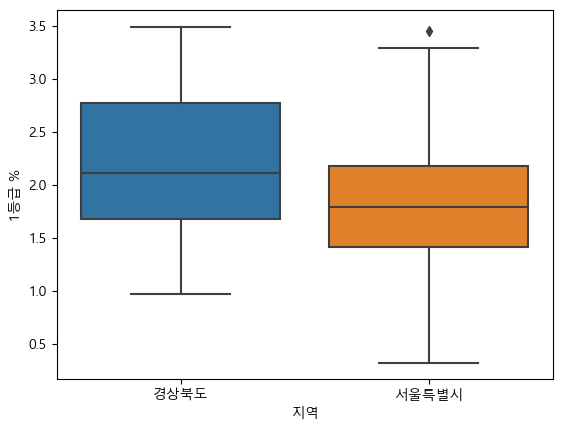

In [54]:
sns.boxplot(data=df_2_AAA, x='지역', y= '1등급 %')

In [55]:
from statannot import add_stat_annotation


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

경상북도 v.s. 서울특별시: t-test independent samples with Bonferroni correction, P_val=1.639e-03 stat=3.220e+00


(<Axes: xlabel='지역', ylabel='1등급 %'>,
 [<statannot.StatResult.StatResult at 0x170abd163b0>])

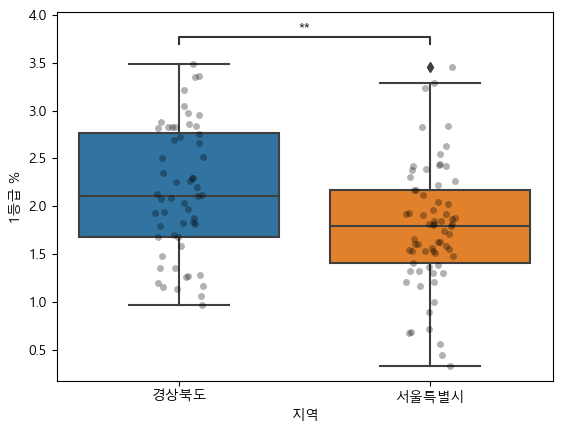

In [56]:
data=df_2_AAA
fig = sns.boxplot(data = df_2_AAA, x='지역',y='1등급 %')
fig2 = sns.stripplot(data = df_2_AAA, x='지역',y='1등급 %',
                    color='k', alpha=.3)
add_stat_annotation(ax=fig, data=df_2_AAA, x='지역', y='1등급 %',
                   box_pairs=[(('경상북도'),
                             ('서울특별시'))],
                   test ='t-test_ind')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

경상북도 v.s. 서울특별시: t-test independent samples with Bonferroni correction, P_val=4.731e-02 stat=2.004e+00


(<Axes: xlabel='지역', ylabel='2등급 %'>,
 [<statannot.StatResult.StatResult at 0x170aba66e30>])

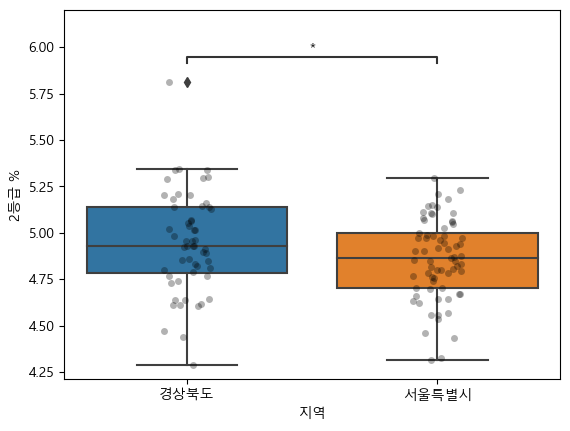

In [57]:
data=df_2_AAA
fig = sns.boxplot(data = df_2_AAA, x='지역',y='2등급 %')
fig2 = sns.stripplot(data = df_2_AAA, x='지역',y='2등급 %',
                    color='k', alpha=.3)
add_stat_annotation(ax=fig, data=df_2_AAA, x='지역', y='2등급 %',
                   box_pairs=[(('경상북도'),
                             ('서울특별시'))],
                   test ='t-test_ind')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

경상북도 v.s. 서울특별시: t-test independent samples with Bonferroni correction, P_val=4.554e-03 stat=-2.890e+00


(<Axes: xlabel='지역', ylabel='3등급 %'>,
 [<statannot.StatResult.StatResult at 0x170ab9c91b0>])

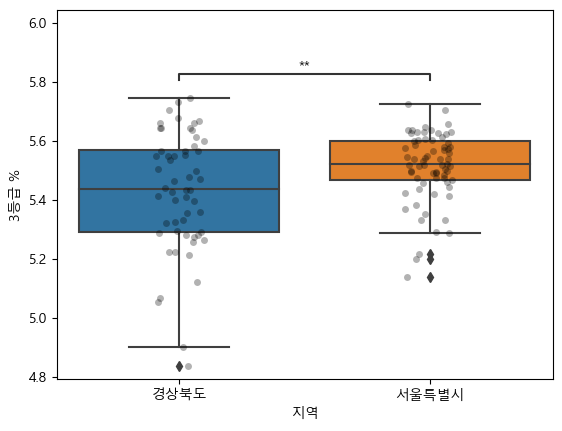

In [58]:
data=df_2_AAA
fig = sns.boxplot(data = df_2_AAA, x='지역',y='3등급 %')
fig2 = sns.stripplot(data = df_2_AAA, x='지역',y='3등급 %',
                    color='k', alpha=.3)
add_stat_annotation(ax=fig, data=df_2_AAA, x='지역', y='3등급 %',
                   box_pairs=[(('경상북도'),
                             ('서울특별시'))],
                   test ='t-test_ind')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

경상북도 v.s. 서울특별시: t-test independent samples with Bonferroni correction, P_val=1.955e-01 stat=-1.302e+00


(<Axes: xlabel='지역', ylabel='4등급 %'>,
 [<statannot.StatResult.StatResult at 0x170ab752dd0>])

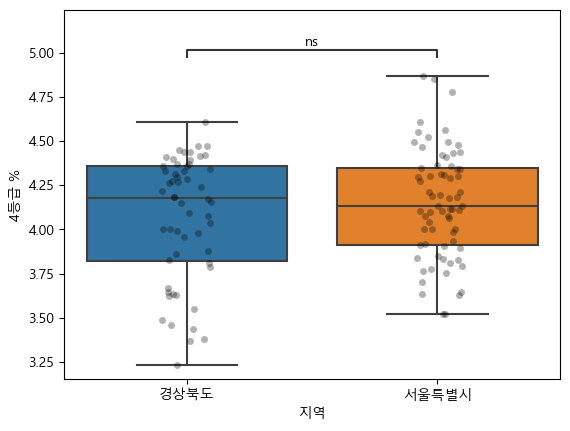

In [59]:
data=df_2_AAA
fig = sns.boxplot(data = df_2_AAA, x='지역',y='4등급 %')
fig2 = sns.stripplot(data = df_2_AAA, x='지역',y='4등급 %',
                    color='k', alpha=.3)
add_stat_annotation(ax=fig, data=df_2_AAA, x='지역', y='4등급 %',
                   box_pairs=[(('경상북도'),
                             ('서울특별시'))],
                   test ='t-test_ind')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

경상북도 v.s. 서울특별시: t-test independent samples with Bonferroni correction, P_val=5.660e-01 stat=-5.755e-01


(<Axes: xlabel='지역', ylabel='5등급 %'>,
 [<statannot.StatResult.StatResult at 0x170ab6ba6e0>])

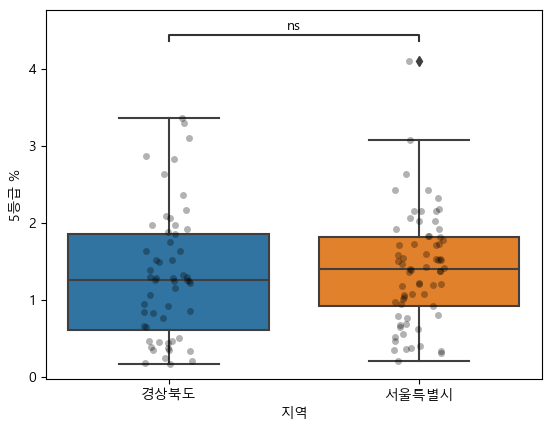

In [60]:
data=df_2_AAA
fig = sns.boxplot(data = df_2_AAA, x='지역',y='5등급 %')
fig2 = sns.stripplot(data = df_2_AAA, x='지역',y='5등급 %',
                    color='k', alpha=.3)
add_stat_annotation(ax=fig, data=df_2_AAA, x='지역', y='5등급 %',
                   box_pairs=[(('경상북도'),
                             ('서울특별시'))],
                   test ='t-test_ind')